# Modeling iris data 
- Using Scikit Learn

## Summary
1. Loading and understanding data
2. Visualizing data
3. Choosing a model and model building
4. Testing 
5. Tuning the model
6. Prediction

### 1. Loading and understanding data

In [66]:
#import load_iris function from datasets module
from sklearn.datasets import load_iris

In [67]:
from matplotlib import pyplot as plt

%matplotlib inline

In [68]:
#save "bunch" object containing iris dataset and its attributes
iris = load_iris()
type(iris)

sklearn.datasets.base.Bunch

In [69]:
# printing the data and target

print("Feature names:")
print(iris.feature_names)
print("Data(X):")
print(iris.data[:3])
print("Target names:[0   1   2]")
print(iris.target_names)
print("Target(y):")
print(iris.target)
#Each row represents one flower and four columns represents four measurements

Feature names:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Data(X):
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]]
Target names:[0   1   2]
['setosa' 'versicolor' 'virginica']
Target(y):
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [70]:
# Check the type and shape of features and target. 
print(type(iris.data))
print(type(iris.target))
print(iris.data.shape)
print(iris.target.shape)

<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
(150, 4)
(150,)


In [71]:
# store feature matrix in "X" - captialized as it represents matrix
X = iris.data

# store response vector in "y" - capitalized as it represents a vector
y = iris.target

### 2. Visualizing Data
- Converting numpy array into Dataframe for data visualization
- Plotting different category based on Sepal length and width
- Plotting different category based on Petal length and width

In [72]:
import pandas as pd
data = pd.DataFrame(X, columns=iris.feature_names)
data['target'] = pd.DataFrame(y.reshape(-1,1), columns=["target"])
data.head(5)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

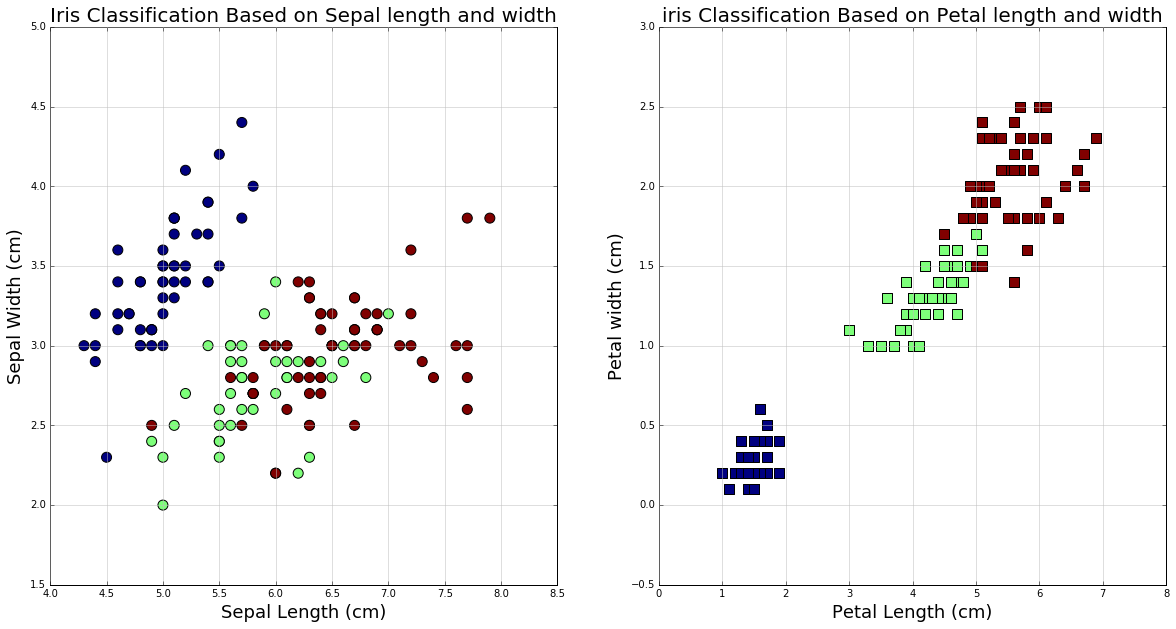

In [73]:
from matplotlib import cm

# Petal Length and Width
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121)
ax.set_title('Iris Classification Based on Sepal length and width', fontsize=20)
ax.set_xlabel('Sepal Length (cm)', fontsize=18)
ax.set_ylabel('Sepal Width (cm)',fontsize=18)
# setting grid lines 
ax.grid(True,linestyle='-',color='0.75')
ax.scatter(data['sepal length (cm)'], data['sepal width (cm)'], s = 100, 
           c=data['target'], marker='o', cmap=cm.jet)

# Sepal Length and Width
ax = fig.add_subplot(122)
ax.set_title("iris Classification Based on Petal length and width", fontsize=20)
ax.set_xlabel('Petal Length (cm)', fontsize=18)
ax.set_ylabel('Petal width (cm)', fontsize=18)
ax.grid(True, linestyle='-', color='0.75')
ax.scatter(data['petal length (cm)'], data['petal width (cm)'], s = 100, 
           c=data['target'], marker='s', cmap=cm.jet)

### 3. Choosing the model
- Need to identify based on features what the species category the data represents. Hence this is a typical **classification problem**.

#### KNN Classification
1. Pick a value of K (e.g. 5)
2. Model calculates the numerical distance of the unknown iris to the known iris data and finds the k smallest distances in the data set
3. From the k observations, use the response that is popular for the k-feature values as the prediction


In [74]:
# import class
from sklearn.neighbors import KNeighborsClassifier

In [75]:
# instantiating estimator. Choosing K=1
knn = KNeighborsClassifier(n_neighbors=1)

In [76]:
# model building
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [77]:
# predicting out-of-sample data
knn.predict([3,5,4,2])
# Multiple Observations of out of sample data
X_new = [[3,5,4,2],[5,4,3,2]]
knn.predict(X_new)

//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([2, 1])

In [78]:
# instantiate the model (using the value K=5)
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model with data
knn.fit(X,y)

#predict the response for new observations
knn.predict(X_new)

array([1, 1])

### 4. Testing: using train/test split method

In [79]:
from sklearn import metrics

# STEP 1: Split X and y into training and testing sets. Here 40% is for testing
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 4)

In [80]:
# printing the X shapes
print(X_train.shape)
print(X_test.shape)

(90, 4)
(60, 4)


In [81]:
# printing the y shapes
print(y_train.shape)
print(y_test.shape)

(90,)
(60,)


#### Test for KNN (K = 5)

In [82]:
# instantiate
knn = KNeighborsClassifier(n_neighbors = 5)

# train
knn.fit(X_train, y_train)

# predict
y_pred = knn.predict(X_test)

# test accuracy
print(metrics.accuracy_score(y_test, y_pred))

0.966666666667


#### Test for KNN (K = 1)

In [83]:
# instantiate class
knn = KNeighborsClassifier(n_neighbors = 1)

# train
knn.fit(X_train, y_train)

# predict
y_pred = knn.predict(X_test)

# test accuracy
print(metrics.accuracy_score(y_test, y_pred))

0.95


### 5. Model Tuning - Finding the optimum value for K
- Lets check the accuracy score for different values of K and determine an optimum K value

In [84]:
k_range = range(1, 31)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))


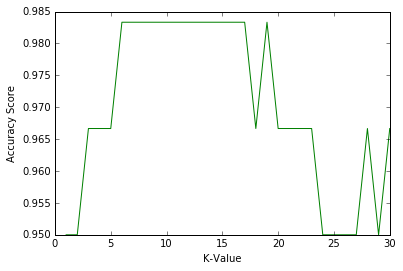

In [85]:
import matplotlib.pyplot as plt

%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores, color="green")
plt.xlabel("K-Value")
plt.ylabel("Accuracy Score") 

### 6. Predicting out-of-sample data
- Choosing K between 10-15 based on the graph

In [86]:
# instantiate class
knn = KNeighborsClassifier(n_neighbors=12)

# training the model using all data
knn.fit(X, y)

#making predictions on out-of-sample data
knn.predict([3, 5, 4, 2])

//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([1])